*Material adapted from: http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html*

February, 2016

#EXPLORATORY DATA ANALYSIS

This notebook's main goal is to get acquaintaced with the data.

The process of selecting model and function are explained throughout the notebook. 

###IMPORT PACKAGES

Let's import packages used in this notebook:

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns

In [252]:
#VISUALIZATION
%matplotlib inline
import matplotlib.pyplot as plt

###IMPORT DATA

So first, we import the file "click_prediction_dataset_small.csv", that contains the data provided for this project.

In [253]:
#Use panda to import csv
data = pd.read_csv('click_prediction_dataset_small.csv', sep=';')
print data.columns.values

#Column 0 includes ad_ref. Column 1 refers to outcome (0= no click, 1=click)
data[:].loc[0:5]

['Unnamed: 0' 'adults' 'adv' 'average' 'check_in' 'check_in_weekday'
 'check_out' 'check_out_weekday' 'children' 'city' 'day' 'default_search'
 'forced_price' 'hotel' 'hotel_category' 'hour' 'integered_hotel_category'
 'integered_provider' 'is_couple' 'is_family' 'is_solo' 'net' 'night_price'
 'pax' 'ppnp' 'price' 'provider' 'rounded_ppnp' 'rounded_price' 'stay'
 'stay_1w' 'sun2mon' 'ts' 'wday' 'week_hour' 'weekend_holidays' 'click?']


,Unnamed: 0,adults,adv,average,check_in,check_in_weekday,check_out,check_out_weekday,children,city,...,rounded_ppnp,rounded_price,stay,stay_1w,sun2mon,ts,wday,week_hour,weekend_holidays,click?
0,0,2,4,7,2015-08-04 00:00:00.000,1,2015-08-06 00:00:00.000,3,0,11658,...,70,200,2,0,False,2015-07-31 23:43:00.371,4,119,0,1
1,1,2,5,9,2015-08-05 00:00:00.000,2,2015-08-06 00:00:00.000,3,0,7835078,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
2,2,2,5,9,2015-08-05 00:00:00.000,2,2015-08-06 00:00:00.000,3,0,7835078,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
3,3,2,1,8,2015-08-01 00:00:00.000,5,2015-08-02 00:00:00.000,6,1,4324,...,10,0,1,0,False,2015-07-31 23:31:11.177,4,119,0,1
4,4,3,2,7,2015-08-02 00:00:00.000,6,2015-08-09 00:00:00.000,6,1,17054,...,140,4000,7,1,False,2015-07-31 22:56:23.819,4,118,0,1
5,5,1,6,8,2015-08-06 00:00:00.000,3,2015-08-09 00:00:00.000,6,0,4324,...,30,100,3,0,False,2015-07-31 22:55:28.935,4,118,0,1


The first column corresponds to ref of register. Let's import again but using this first column as "row" names.

In [254]:
#Import again, first column is row names
data = pd.read_csv('click_prediction_dataset_small.csv', index_col = 0, sep=';')
data[:][0:5]

,adults,adv,average,check_in,check_in_weekday,check_out,check_out_weekday,children,city,day,...,rounded_ppnp,rounded_price,stay,stay_1w,sun2mon,ts,wday,week_hour,weekend_holidays,click?
0,2,4,7,2015-08-04 00:00:00.000,1,2015-08-06 00:00:00.000,3,0,11658,31,...,70,200,2,0,False,2015-07-31 23:43:00.371,4,119,0,1
1,2,5,9,2015-08-05 00:00:00.000,2,2015-08-06 00:00:00.000,3,0,7835078,31,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
2,2,5,9,2015-08-05 00:00:00.000,2,2015-08-06 00:00:00.000,3,0,7835078,31,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
3,2,1,8,2015-08-01 00:00:00.000,5,2015-08-02 00:00:00.000,6,1,4324,31,...,10,0,1,0,False,2015-07-31 23:31:11.177,4,119,0,1
4,3,2,7,2015-08-02 00:00:00.000,6,2015-08-09 00:00:00.000,6,1,17054,31,...,140,4000,7,1,False,2015-07-31 22:56:23.819,4,118,0,1


Let's look at the values of first register

In [255]:
data.loc[0]

adults                                            2
adv                                               4
average                                           7
check_in                    2015-08-04 00:00:00.000
check_in_weekday                                  1
check_out                   2015-08-06 00:00:00.000
check_out_weekday                                 3
children                                          0
city                                          11658
day                                              31
default_search                                    0
forced_price                                      0
hotel                                          7744
hotel_category                                 ****
hour                                             23
integered_hotel_category                          9
integered_provider                      8.40791e+07
is_couple                                         1
is_family                                         0
is_solo     

There are several columns that contain dates. Let's check them:

In [256]:
data[["check_in","check_out","ts"]].loc[0]

check_in     2015-08-04 00:00:00.000
check_out    2015-08-06 00:00:00.000
ts           2015-07-31 23:43:00.371
Name: 0, dtype: object

In [257]:
print("Type of 'check_in': ")
print(type(data["check_in"].loc[0]))

Type of 'check_in': 
<type 'str'>


So... they imported as text. Let's try to import them as data:

In [258]:
#Use panda to import csv
data = pd.read_csv('click_prediction_dataset_small.csv', sep=';', parse_dates=["check_in","check_out","ts"])
print data.columns.values
data[:].loc[0:5]

['Unnamed: 0' 'adults' 'adv' 'average' 'check_in' 'check_in_weekday'
 'check_out' 'check_out_weekday' 'children' 'city' 'day' 'default_search'
 'forced_price' 'hotel' 'hotel_category' 'hour' 'integered_hotel_category'
 'integered_provider' 'is_couple' 'is_family' 'is_solo' 'net' 'night_price'
 'pax' 'ppnp' 'price' 'provider' 'rounded_ppnp' 'rounded_price' 'stay'
 'stay_1w' 'sun2mon' 'ts' 'wday' 'week_hour' 'weekend_holidays' 'click?']


,Unnamed: 0,adults,adv,average,check_in,check_in_weekday,check_out,check_out_weekday,children,city,...,rounded_ppnp,rounded_price,stay,stay_1w,sun2mon,ts,wday,week_hour,weekend_holidays,click?
0,0,2,4,7,2015-08-04,1,2015-08-06,3,0,11658,...,70,200,2,0,False,2015-07-31 23:43:00.371,4,119,0,1
1,1,2,5,9,2015-08-05,2,2015-08-06,3,0,7835078,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
2,2,2,5,9,2015-08-05,2,2015-08-06,3,0,7835078,...,30,0,1,0,False,2015-07-31 23:33:33.339,4,119,0,1
3,3,2,1,8,2015-08-01,5,2015-08-02,6,1,4324,...,10,0,1,0,False,2015-07-31 23:31:11.177,4,119,0,1
4,4,3,2,7,2015-08-02,6,2015-08-09,6,1,17054,...,140,4000,7,1,False,2015-07-31 22:56:23.819,4,118,0,1
5,5,1,6,8,2015-08-06,3,2015-08-09,6,0,4324,...,30,100,3,0,False,2015-07-31 22:55:28.935,4,118,0,1


We see it imported ok. Let's check type is date:

In [259]:
print("Type of 'check_in': ")
print(type(data["check_in"].loc[0]))

Type of 'check_in': 
<class 'pandas.tslib.Timestamp'>


It's a success!

Now let's play a little bit. First, shape of the dataframe:

In [260]:
print data.shape
print (type(data))

(19072, 37)
<class 'pandas.core.frame.DataFrame'>


We have a panda's dataframe, 19072 cases and 37 features. 

##Which features to check?

##Number of  adults per booking
Let's begin looking at profile of bookings:


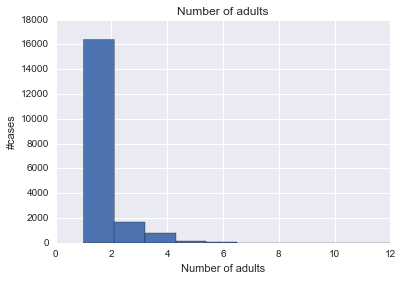

In [261]:
#Let's plot the number of adults per booking

plt.hist(data["adults"])
plt.title("Number of adults")
plt.xlabel("Number of adults")
plt.ylabel("#cases")
plt.show()

I think it might be interesting to check behaviour of bookings depending if its a family or not.
Price: let's keep the price per night and per person  (ppnp)

First let's get a copy of the data:

In [262]:
data_2 = data[['adults','children','adv','stay','is_couple','is_family','is_solo',
               'ppnp','weekend_holidays','click?']].loc[:]
data_2[:].loc[0]

adults               2.0000
children             0.0000
adv                  4.0000
stay                 2.0000
is_couple            1.0000
is_family            0.0000
is_solo              0.0000
ppnp                71.5525
weekend_holidays     0.0000
click?               1.0000
Name: 0, dtype: float64

I want to check if couples, families and solo bookings behave the same...
So, I will create a column where 1= solo, 2=couple and 3= family, 0= anything else.
I also want to check total number of people.

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


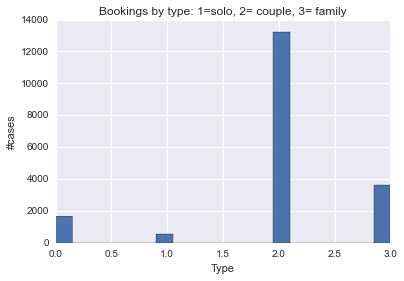

In [263]:
data_2["type"]= data_2["is_solo"] + 2*data_2["is_couple"] + 3*data_2["is_family"]
data_2["people"]=data_2["adults"] + data_2["children"]

#Let's plot the number of each kind

plt.hist(data_2["type"], bins=20)
plt.title("Bookings by type: 1=solo, 2= couple, 3= family")
plt.xlabel("Type")
plt.ylabel("#cases")
plt.show()

Let's drop de data we won't use:

In [264]:
del data_2["is_couple"]
del data_2["is_family"]
del data_2["is_solo"]
del data_2["children"]
del data_2["adults"]

data_2[0:5][:]

,adv,stay,ppnp,weekend_holidays,click?,type,people
0,4,2,71.552500,0,1,2,2
1,5,1,36.785000,0,1,2,2
2,5,1,36.785000,0,1,2,2
3,1,1,19.500000,0,1,3,3
4,2,7,145.412143,0,1,3,4


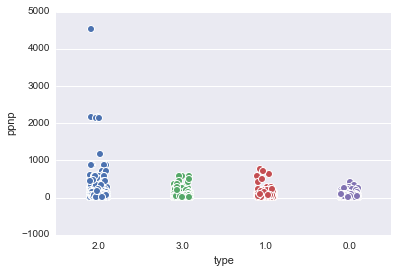

In [265]:
sns.stripplot(x="type", y="ppnp", data=data_2[:], jitter=True);

There seems to be a very pricey booking that prevents me to see the distribution. Let's exclude it:

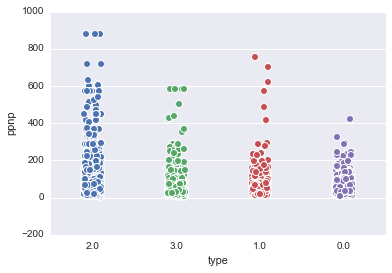

In [266]:
price = data_2["ppnp"].loc[:]
sns.stripplot(x="type", y="ppnp", data=data_2[:].loc[price < 1000], jitter=True)

Let's see if it relates to click:

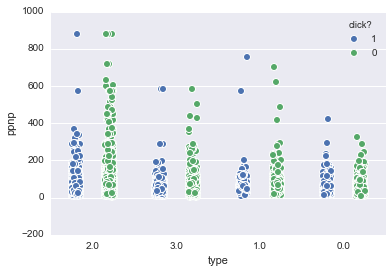

In [267]:
sns.stripplot(x="type", y="ppnp", data=data_2[:].loc[price <1000], jitter=True, hue="click?")

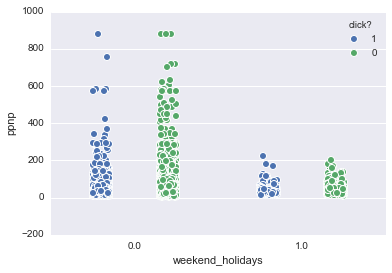

In [268]:
sns.stripplot(x="weekend_holidays", y="ppnp", data=data_2[:].loc[price < 1000], jitter=True, hue = "click?")

Now let's see about distributions:


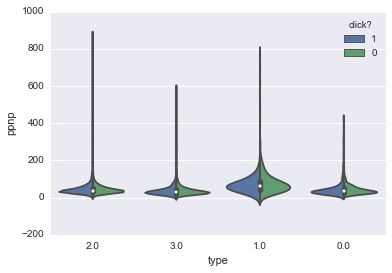

In [269]:
sns.violinplot(x="type", y="ppnp", hue="click?", data=data_2[:].loc[price<1000], split=True);

I think most of data is under 200. Let's check:

In [270]:
print(price.quantile(q=0.95))

99.2317


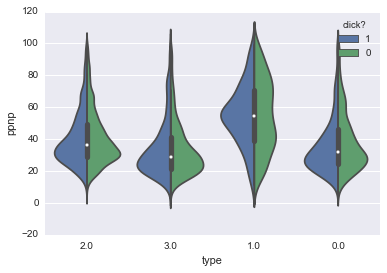

In [271]:
sns.violinplot(x="type", y="ppnp", hue="click?", data=data_2[:].loc[price<100], split=True);

Let's see if price and previous days impact click. First all data:

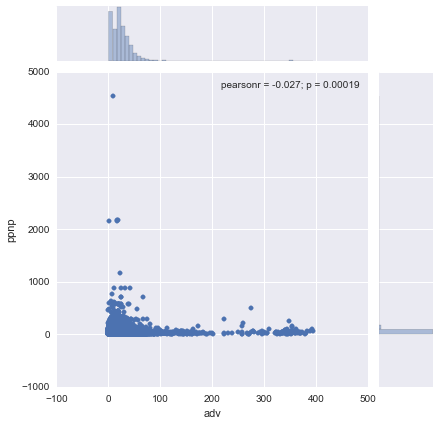

In [272]:
sns.jointplot(x="adv", y="ppnp",data=data_2[:].loc[:]);

Now we will separate click /no click

CLICK=1


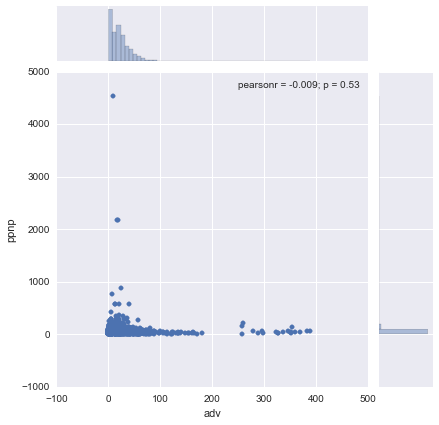

In [273]:
click = data_2["click?"].loc[:]
print("CLICK=1")
sns.jointplot(x="adv", y="ppnp",data=data_2[click==1].loc[:]);

CLICK=0


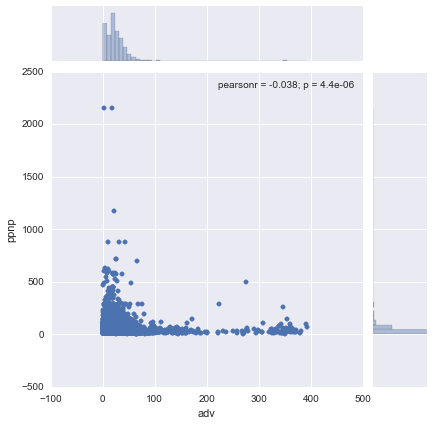

In [274]:
print("CLICK=0")
sns.jointplot(x="adv", y="ppnp",data=data_2[click==0].loc[:]);

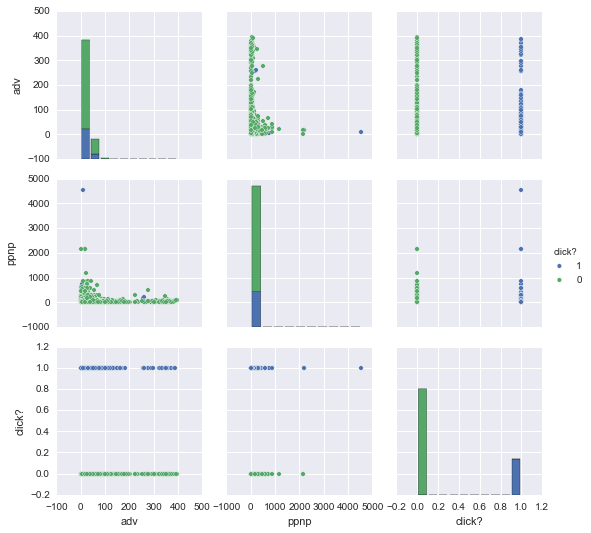

In [275]:
data_3 = data_2[["adv","ppnp","click?"]].loc[:]
sns.pairplot(data_3, hue="click?")

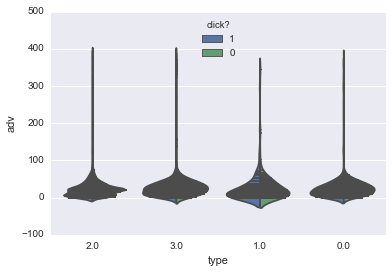

In [276]:
sns.violinplot(x="type", y="adv", hue="click?", data=data_2[:].loc[price<100],
               split=True, inner="stick");

In [280]:
adv = data_2["adv"].loc[:]
print(adv.quantile(q=0.95))

57.0


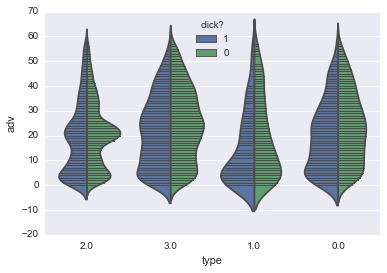

In [283]:

sns.violinplot(x="type", y="adv", hue="click?", data=data_2[:].loc[adv<=57],
               split=True, inner="stick");

That's it for now!